### Image Compression Using Wavelet Transforms
The main goal of this project is to explore the application of wavelet transforms for image compression. By using both predefined wavelets from the pywt library and a custom-implemented wavelet by myself, we want to compare the effectiveness of different wavelet transforms in reducing image file size while maintaining acceptable image quality.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pywt
import pywt.data
from skimage.data import camera
from skimage.util import random_noise
from skimage import img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio as psnr

In [26]:
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

### Selection of Wavelets:
Selected several well-known wavelets (haar, db1, db2, bior1.3) to assess their compression capabilities.
Applied these wavelets to a standard test image from skimage.data also added Gaussian noise to it to simulate real-world imperfect conditions.

Atthe begining implemented a 2D Discrete Wavelet Transform (DWT) using pywt.wavedec2. Applied soft thresholding to the detail coefficients to reduce the data size by removing less significant information.after that reconstructed the images using the inverse DWT (pywt.waverec2) to analyze the effects of compression.

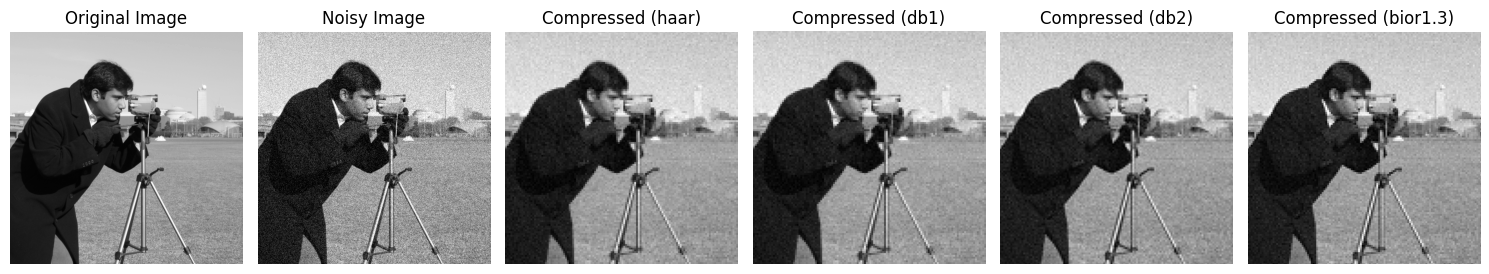

In [27]:
# Function to perform 2D DWT and image compression
def dwt_compression(image, wavelet_name, threshold):
    # Perform 2D Discrete Wavelet Transform
    coeffs2 = pywt.wavedec2(image, wavelet_name, level=2)
    
    # Apply thresholding to the detail coefficients
    coeffs2_thresh = [coeffs2[0]]  # Approximation coefficients remain unchanged
    for detail_level in coeffs2[1:]:
        cH, cV, cD = detail_level
        cH_thresh = pywt.threshold(cH, threshold, mode='soft')
        cV_thresh = pywt.threshold(cV, threshold, mode='soft')
        cD_thresh = pywt.threshold(cD, threshold, mode='soft')
        coeffs2_thresh.append((cH_thresh, cV_thresh, cD_thresh))
    
    # Reconstruct the image using Inverse Discrete Wavelet Transform
    compressed_image = pywt.waverec2(coeffs2_thresh, wavelet_name)
    
    return compressed_image

# Load an example image
image = camera()


# Add Gaussian noise for visualization purposes
sigma = 0.1
noisy_image = random_noise(image, mode='gaussian', var=sigma**2)

# List of wavelets to be used
wavelets = ['haar', 'db1', 'db2', 'bior1.3']
# Set a threshold for compression
threshold = 20

# Plot original, noisy, and compressed images
fig, axes = plt.subplots(1, len(wavelets) + 2, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Noisy image
axes[1].imshow(noisy_image, cmap=plt.cm.gray)
axes[1].set_title('Noisy Image')
axes[1].axis('off')


# Compressed images with different wavelets
for i, wavelet in enumerate(wavelets, start=2):
    compressed_image = dwt_compression(noisy_image, wavelet, threshold)
    compressed_image = np.clip(compressed_image, 0, 1)
    compressed_image_uint8 = img_as_ubyte(compressed_image)

    axes[i].imshow(compressed_image, cmap=plt.cm.gray)
    axes[i].set_title(f'Compressed ({wavelet})')
    axes[i].axis('off')

    cv2.imwrite(f'compressed_{wavelet}.jpg', compressed_image_uint8)
    
noisy_image = np.clip(noisy_image, 0, 1)
noisy_image_uint8 = img_as_ubyte(noisy_image)
cv2.imwrite(f'noisy.jpeg', noisy_image_uint8)
plt.tight_layout()
plt.show()

In [28]:
path = {'compressed_haar': 'C:/romena/unige/wavelet_compression/compressed_haar.jpg', 'compressed_db1': 'C:/romena/unige/wavelet_compression/compressed_db1.jpg', 'compressed_db2': 'C:/romena/unige/wavelet_compression/compressed_db2.jpg', 'compressed_bior1.3': 'C:/romena/unige/wavelet_compression/compressed_bior1.3.jpg', 'noisy': 'C:/romena/unige/wavelet_compression/noisy.jpeg'}
for i in path:
  size_img= os.path.getsize(path[i])
  size_img= size_img/1024
  print(i +'='+ str(size_img) + 'KB')
  size_img= 0

compressed_haar=71.3857421875KB
compressed_db1=71.3857421875KB
compressed_db2=78.6826171875KB
compressed_bior1.3=92.943359375KB
noisy=181.1435546875KB


### Custom Wavelet Implementation:
Developed a custom Haar-like wavelet transform that manually defines the decomposition and reconstruction processes. And compare the performance of the custom wavelet with standard wavelets to find effectiveness.


We decompose the image into approximation and detail coefficients using a custom Haar-like wavelet transform. The horizontal pass processes each row to capture horizontal features. The vertical pass processes each column to capture vertical features. By transforming the image, we separate the important information (approximation) from the less critical details (high-frequency noise). This separation allows us to apply thresholding to the detail coefficients, reducing the amount of data that needs to be stored.


In [29]:
# Custom Haar-like wavelet transform
def custom_dwt2(image):
    rows, cols = image.shape
    transformed_image = np.zeros_like(image)
    half_rows, half_cols = rows // 2, cols // 2

    # Horizontal pass: The horizontal pass processes each row to capture horizontal features.

    for i in range(rows):
        for j in range(half_cols):
            transformed_image[i, j] = (image[i, 2 * j] + image[i, 2 * j + 1]) / 2  # Approximation: The approximation coefficients represent the low-frequency components (smooth parts of the image).
            transformed_image[i, half_cols + j] = (image[i, 2 * j] - image[i, 2 * j + 1]) / 2  # Detail: The detail coefficients represent the high-frequency components (edges and textures).

    # Vertical pass: The vertical pass processes each column to capture vertical features.
    temp_image = transformed_image.copy()
    for j in range(cols):
        for i in range(half_rows):
            transformed_image[i, j] = (temp_image[2 * i, j] + temp_image[2 * i + 1, j]) / 2  # Approximation
            transformed_image[half_rows + i, j] = (temp_image[2 * i, j] - temp_image[2 * i + 1, j]) / 2  # Detail

    return transformed_image



# Custom inverse Haar-like wavelet transform
def custom_idwt2(transformed_image):
    rows, cols = transformed_image.shape
    reconstructed_image = np.zeros_like(transformed_image)
    half_rows, half_cols = rows // 2, cols // 2

    # Vertical pass
    for j in range(cols):
        for i in range(half_rows):
            reconstructed_image[2 * i, j] = transformed_image[i, j] + transformed_image[half_rows + i, j]  # Approximation + Detail
            reconstructed_image[2 * i + 1, j] = transformed_image[i, j] - transformed_image[half_rows + i, j]  # Approximation - Detail

    # Horizontal pass
    temp_image = reconstructed_image.copy()
    for i in range(rows):
        for j in range(half_cols):
            reconstructed_image[i, 2 * j] = temp_image[i, j] + temp_image[i, half_cols + j]  # Approximation + Detail
            reconstructed_image[i, 2 * j + 1] = temp_image[i, j] - temp_image[i, half_cols + j]  # Approximation - Detail

    return reconstructed_image


# Function to perform custom DWT compression
def custom_dwt_compression(image, threshold):
    # Perform custom 2D Discrete Wavelet Transform
    coeffs2 = custom_dwt2(image)
    
    # Apply more conservative thresholding to the detail coefficients
    coeffs2_thresh = coeffs2.copy()
    coeffs2_thresh[np.abs(coeffs2_thresh) < threshold] = 0.1 * coeffs2_thresh[np.abs(coeffs2_thresh) < threshold]
    
    # Reconstruct the image using custom Inverse Discrete Wavelet Transform
    compressed_image = custom_idwt2(coeffs2_thresh)
    
    return compressed_image

C:\Users\rmnas\AppData\Local\Temp\ipykernel_1692\2444922071.py:42: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(image, compressed_image)


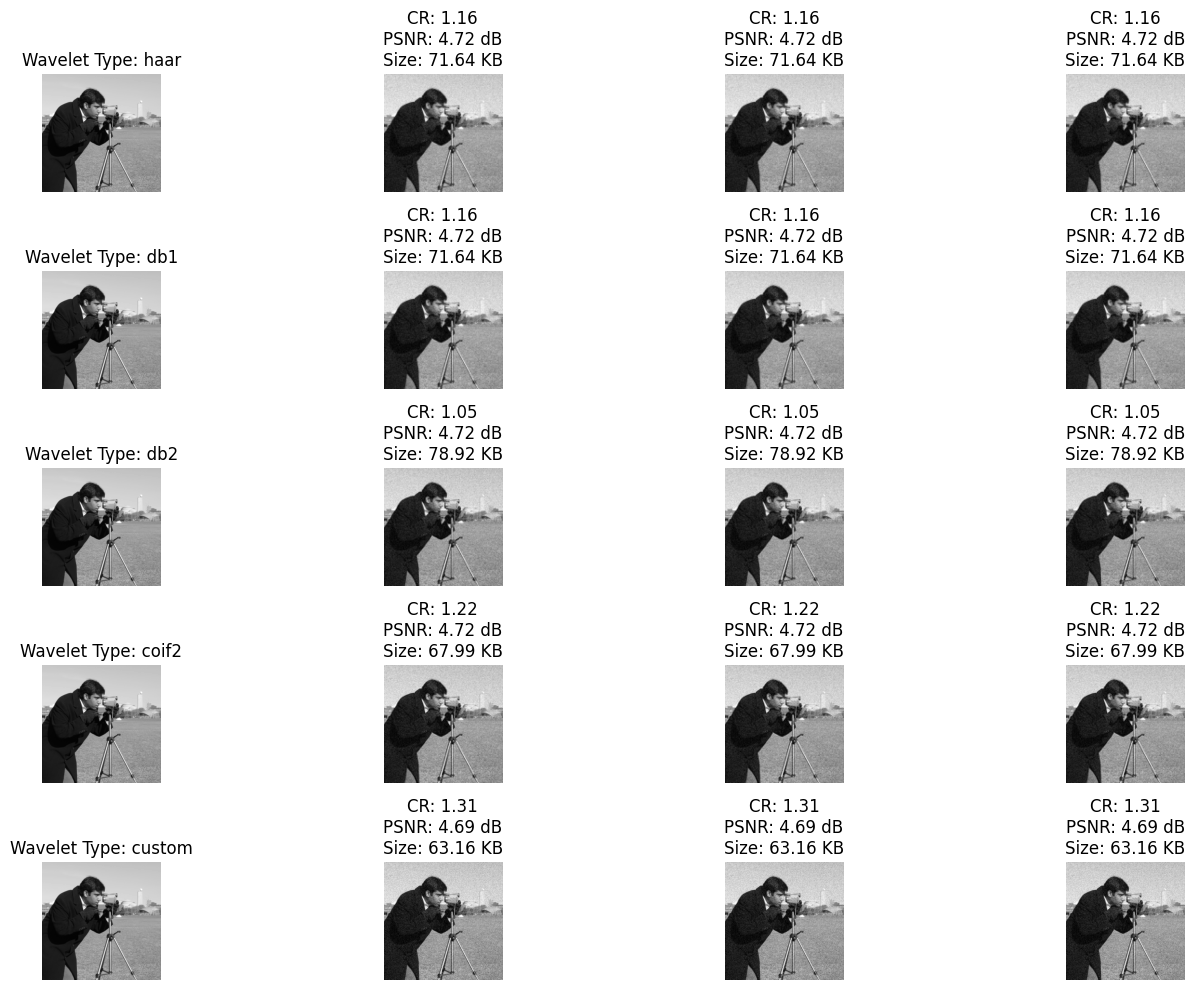

Wavelet: haar, Threshold: 5, PSNR: 4.72 dB, CR: 1.16, Size: 71.64 KB
Wavelet: haar, Threshold: 10, PSNR: 4.72 dB, CR: 1.16, Size: 71.64 KB
Wavelet: haar, Threshold: 20, PSNR: 4.72 dB, CR: 1.16, Size: 71.64 KB
Wavelet: db1, Threshold: 5, PSNR: 4.72 dB, CR: 1.16, Size: 71.64 KB
Wavelet: db1, Threshold: 10, PSNR: 4.72 dB, CR: 1.16, Size: 71.64 KB
Wavelet: db1, Threshold: 20, PSNR: 4.72 dB, CR: 1.16, Size: 71.64 KB
Wavelet: db2, Threshold: 5, PSNR: 4.72 dB, CR: 1.05, Size: 78.92 KB
Wavelet: db2, Threshold: 10, PSNR: 4.72 dB, CR: 1.05, Size: 78.92 KB
Wavelet: db2, Threshold: 20, PSNR: 4.72 dB, CR: 1.05, Size: 78.92 KB
Wavelet: coif2, Threshold: 5, PSNR: 4.72 dB, CR: 1.22, Size: 67.99 KB
Wavelet: coif2, Threshold: 10, PSNR: 4.72 dB, CR: 1.22, Size: 67.99 KB
Wavelet: coif2, Threshold: 20, PSNR: 4.72 dB, CR: 1.22, Size: 67.99 KB
Wavelet: custom, Threshold: 5, PSNR: 4.69 dB, CR: 1.31, Size: 63.16 KB
Wavelet: custom, Threshold: 10, PSNR: 4.69 dB, CR: 1.31, Size: 63.16 KB
Wavelet: custom, Thresho

C:\Users\rmnas\AppData\Local\Temp\ipykernel_1692\2444922071.py:61: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(image, compressed_image)


In [30]:
# Load an example image
image = camera()

# Add Gaussian noise for visualization purposes
sigma = 0.1
noisy_image = random_noise(image, mode='gaussian', var=sigma**2)

# Save original image to calculate its size
cv2.imwrite('original_image.jpg', img_as_ubyte(image))
original_size = os.path.getsize('original_image.jpg')

# List of wavelets to be used (including custom)
wavelets = ['haar', 'db1', 'db2', 'coif2', 'custom']
# List of thresholds for different CR
thresholds = [5, 10, 20]  # Lower thresholds for less aggressive compression

# Plot original, noisy, and compressed images
fig, axes = plt.subplots(len(wavelets), len(thresholds) + 1, figsize=(15, 10))

# Original image
for i, wavelet in enumerate(wavelets):
    axes[i, 0].imshow(image, cmap=plt.cm.gray)
    axes[i, 0].set_title(f'Wavelet Type: {wavelet}')
    axes[i, 0].axis('off')

# Compressed images with different wavelets and thresholds
for i, wavelet in enumerate(wavelets):
    for j, threshold in enumerate(thresholds):
        if wavelet == 'custom':
            compressed_image = custom_dwt_compression(noisy_image, threshold)
        else:
            compressed_image = dwt_compression(noisy_image, wavelet, threshold)
        compressed_image = np.clip(compressed_image, 0, 1)
        compressed_image_uint8 = img_as_ubyte(compressed_image)

        # Save compressed image to calculate its size
        compressed_filename = f'compressed_{wavelet}_threshold_{threshold}.jpg'
        cv2.imwrite(compressed_filename, compressed_image_uint8)
        compressed_size = os.path.getsize(compressed_filename)

        # Calculate PSNR
        psnr_value = psnr(image, compressed_image)

        # Calculate Compression Ratio (CR)
        cr_value = original_size / compressed_size

        axes[i, j+1].imshow(compressed_image, cmap=plt.cm.gray)
        axes[i, j+1].set_title(f'CR: {cr_value:.2f}\nPSNR: {psnr_value:.2f} dB\nSize: {compressed_size / 1024:.2f} KB')
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

# Print PSNR and CR values for comparison
for i, wavelet in enumerate(wavelets):
    for j, threshold in enumerate(thresholds):
        compressed_filename = f'compressed_{wavelet}_threshold_{threshold}.jpg'
        compressed_size = os.path.getsize(compressed_filename)
        cr_value = original_size / compressed_size
        compressed_image = cv2.imread(compressed_filename, cv2.IMREAD_GRAYSCALE) / 255.0
        psnr_value = psnr(image, compressed_image)
        print(f'Wavelet: {wavelet}, Threshold: {threshold}, PSNR: {psnr_value:.2f} dB, CR: {cr_value:.2f}, Size: {compressed_size / 1024:.2f} KB')
